In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Part 1 - Getting the data and defining parameters

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)



training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/train',
                                                 target_size = (64, 64),
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale'
                                                 )
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/validate',
                                                 target_size = (64, 64),
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale'
                                                 )
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/ABIDE-I dataset/A_Prepared_Data/test',
                                            target_size = (64, 64),
                                            class_mode = 'binary',
                                            color_mode = 'grayscale')






Found 7176 images belonging to 2 classes.
Found 1460 images belonging to 2 classes.
Found 2450 images belonging to 2 classes.


In [16]:
# Part 2 - Creating the CNN model

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization
from keras.layers import MaxPooling2D, Activation
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


# Initialising the CNN
classifier = Sequential()

# input and first convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 1)))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3)))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3)))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))

# Adding a fourth convolutional layer
classifier.add(Conv2D(128, (3, 3)))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 64))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 batch_normalization_1 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 29, 29, 64)       

In [17]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/ABIDE-I dataset/weight.hdf5", verbose=1, save_best_only=True)

In [18]:
history = classifier.fit_generator(training_set,
                                   steps_per_epoch=training_set.n // 32,
                                   epochs=20,  # Specify the number of epochs
                                   validation_data=validation_set,
                                   validation_steps = validation_set.n // 32,
                                   callbacks=[checkpointer , earlystopping]
                                   )


Epoch 1/20


<ipython-input-18-b499ed556d4d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set,


224/224 [==============================] - ETA: 0s - loss: 0.8228 - accuracy: 0.5062
Epoch 1: val_loss improved from inf to 0.74065, saving model to /content/drive/MyDrive/ABIDE-I dataset/weight.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


224/224 [==============================] - 32s 110ms/step - loss: 0.8228 - accuracy: 0.5062 - val_loss: 0.7407 - val_accuracy: 0.3694
Epoch 2/20
224/224 [==============================] - ETA: 0s - loss: 0.7413 - accuracy: 0.5113
Epoch 2: val_loss improved from 0.74065 to 0.70824, saving model to /content/drive/MyDrive/ABIDE-I dataset/weight.hdf5
224/224 [==============================] - 25s 112ms/step - loss: 0.7413 - accuracy: 0.5113 - val_loss: 0.7082 - val_accuracy: 0.3701
Epoch 3/20
224/224 [==============================] - ETA: 0s - loss: 0.7183 - accuracy: 0.5120
Epoch 3: val_loss did not improve from 0.70824
224/224 [==============================] - 24s 109ms/step - loss: 0.7183 - accuracy: 0.5120 - val_loss: 0.7236 - val_accuracy: 0.3688
Epoch 4/20
224/224 [==============================] - ETA: 0s - loss: 0.7086 - accuracy: 0.5062
Epoch 4: val_loss did not improve from 0.70824
224/224 [==============================] - 24s 107ms/step - loss: 0.7086 - accuracy: 0.5062 - val

___

In [19]:
import os
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


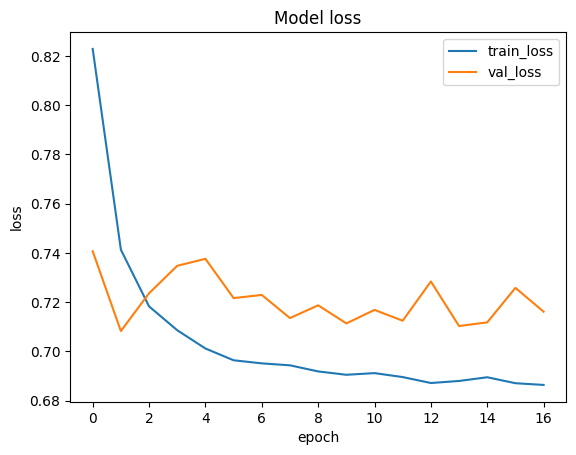

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [22]:
classifier.load_weights("/content/drive/MyDrive/ABIDE-I dataset/weight.hdf5")

In [23]:
# Evaluate the performance of the model
evaluate = classifier.evaluate(test_set, steps = test_set.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

76/76 [==============================] - 760s 10s/step - loss: 0.6893 - accuracy: 0.5465
Accuracy Test : 0.5464637875556946


77/77 [==============================] - 5s 66ms/step
Test Accuracy: 54.69%


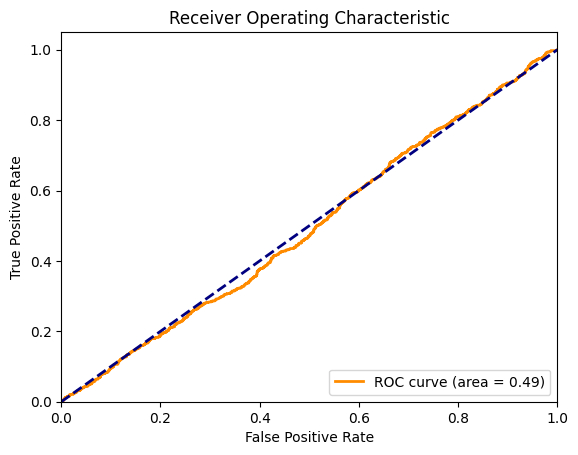

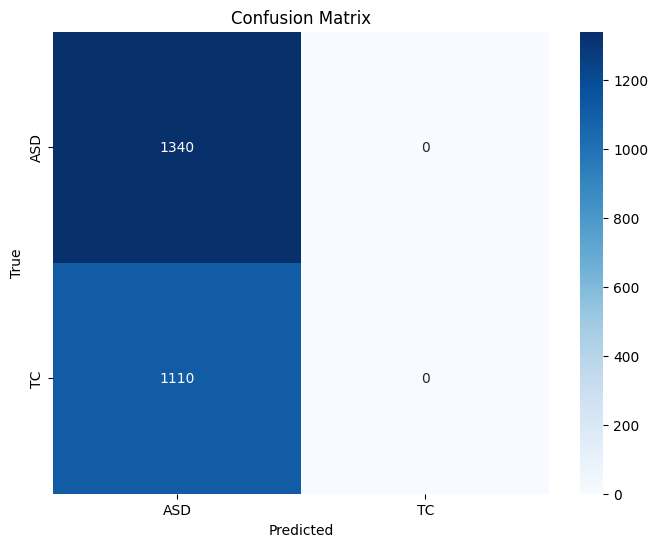

Confusion Matrix:
[[1340    0]
 [1110    0]]


In [26]:
# Get the list of class names from the data generator
class_names = list(training_set.class_indices.keys())

# Make predictions on the test data
predictions = classifier.predict(test_set)

# 'predictions' will contain the predicted probabilities for each image
# For binary classification, you can threshold the probabilities to get class predictions (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Get the true class labels for the test data
true_classes = test_set.classes

# Calculate test accuracy
test_accuracy = accuracy_score(true_classes, predicted_classes)

# Print and return the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print and return the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

